<a href="https://colab.research.google.com/github/fortesfr/ToastMaster_Apps/blob/main/TM_Neurotic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube Transcript Function

Popular sites include Clipconverter, Free CC Converter Tool, Keepvid (also offers video download), and Way With Words. 

In [1]:
# !pip3 install youtube_transcript_api

In [38]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import JSONFormatter

# Must be a single transcript.
transcript = YouTubeTranscriptApi.get_transcript("GVsUOuSjvcg")

formatter = JSONFormatter()

# .format_transcript(transcript) turns the transcript into a JSON string.
json_formatted = formatter.format_transcript(transcript)


# Now we can write it out to a file.
with open('your_filename.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_formatted)

# Now should have a new JSON file that you can easily read back into Python

In [39]:
#Import json library to make usable
import json
#Get rid of \n new line
file = json_formatted.replace('\\n', ' ')
text_raw = json.loads(file)

In [40]:
print(text_raw[1])
print(text_raw[1]['text'])
print(type(text_raw))

{'text': 'analog computers were the most powerful computers on Earth,', 'start': 1.35, 'duration': 3.75}
analog computers were the most powerful computers on Earth,
<class 'list'>


In [51]:
import pandas as pd
#Convert to dataframe
pd.set_option('display.max_colwidth', None)
text_df = pd.DataFrame(text_raw)
#Saving only the text column
text = text_df['text']
#Convert column to string
text_str = text.to_string(index=False)

In [55]:
print(text_str)

                                    - For hundreds of years,
 analog computers were the most powerful computers on Earth,
 predicting eclipses, tides, and guiding anti-aircraft guns.
           Then, with the advent of solid-state transistors,
                                 digital computers took off.
            Now, virtually every computer we use is digital.
  But today, a perfect storm of factors is setting the scene
                      for a resurgence of analog technology.
                                 This is an analog computer,
           and by connecting these wires in particular ways,
                     I can program it to solve a whole range
                                  of differential equations.
               For example, this setup allows me to simulate
                      a damped mass oscillating on a spring.
   So on the oscilloscope, you can actually see the position
                                      of the mass over time.
                        

# Video Processing
librosa_moviepy link
https://python.plainenglish.io/how-to-extract-audio-from-video-in-python-51c4dcd5989f

## No Librosa

In [1]:
from moviepy.editor import *

#save video clip 
audioclip = AudioFileClip("Movie on 2022-03-12 at 7.18 PM.mov")

#extract audio to .wav for librosa later
audioclip.write_audiofile("my_audio.wav")

Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 851, in structured_traceback
    assert etb is not None
Assertio

MoviePy - Writing audio in my_audio.wav


MoviePy - Done.


In [2]:
import librosa
import IPython.display as ipd #to listen to audio

audio, sr = librosa.load('my_audio.wav')
ipd.Audio(audio, rate = sr)

In [3]:
import librosa.display #needs numpy==1.14.0 (pip install --force-reinstall numpy==1.19.3)

audio, _ = librosa.effects.trim(audio)
librosa.display.waveshow(audio, sr=sr)

Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.9/site-packages/IPython/core/ultratb.py", line 851, in structured_traceback
    assert etb is not None
Assertio

ImportError: numpy.core.multiarray failed to import

## Another Method
https://blog.devgenius.io/easy-audio-visualization-python-d3c6aa935212

In [5]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play
import time
from multiprocessing import Process

wavFile = "my_audio.wav"

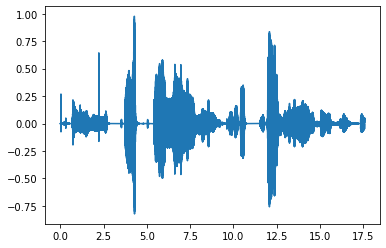

In [3]:
#Using soundfile to plot wavfile
data, samplerate = sf.read(wavFile)

n = len(data) 
Fs = samplerate

ch1 = np.array([data[i][0] for i in range (n)])
ch2 = np.array([data[i][1] for i in range (n)])

time_axis = np.linspace(0, n/Fs, n, endpoint =False)
sound_axis = ch1

plt.plot(time_axis, sound_axis)
plt.show()

In [6]:
#for playing audio -- did not continue with tutorial - max plot move with audio
def playing_audio():
    song = AudioSegment.from_wav(wavFile)
    play(song)

https://www.youtube.com/watch?v=0ALKGR0I5MA
autocorrelation - brute force FOR PITCH


In [ ]:

https://doi.org/10.1044/leader.FTR1.08042003.6
-#Prosody Science


## OTHER

Original scraping idea- html of transcript

* style-scope ytd-engagement-panel-section-list-renderer (Largest Container of Transcript)
* style-scope ytd-transcript-renderer (Smallest Container before individual lines)